In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import poisson
from numpy.random import normal
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5

plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True

plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 500  

In [2]:

np.random.seed(42069)

def N_t(l,T,n):
    dt = T/n
    N = np.zeros(n,dtype = int)
    N[0] = 0
    for i in range(n-1):
        N[i+1] = N[i] + poisson(l*dt)
    return N

def Comp_Poiss(l,mu,sigma,T,n):
    N = N_t(l,T,n)
    dt = T/n
    C = np.zeros(n,dtype = int)
    Y = normal(mu,sigma,N[n-1])
    C[0] = Y[0]
    for i in range(n-1):
        C[i+1] = C[i] + sum(Y[N[i]:N[i+1]])
    return C

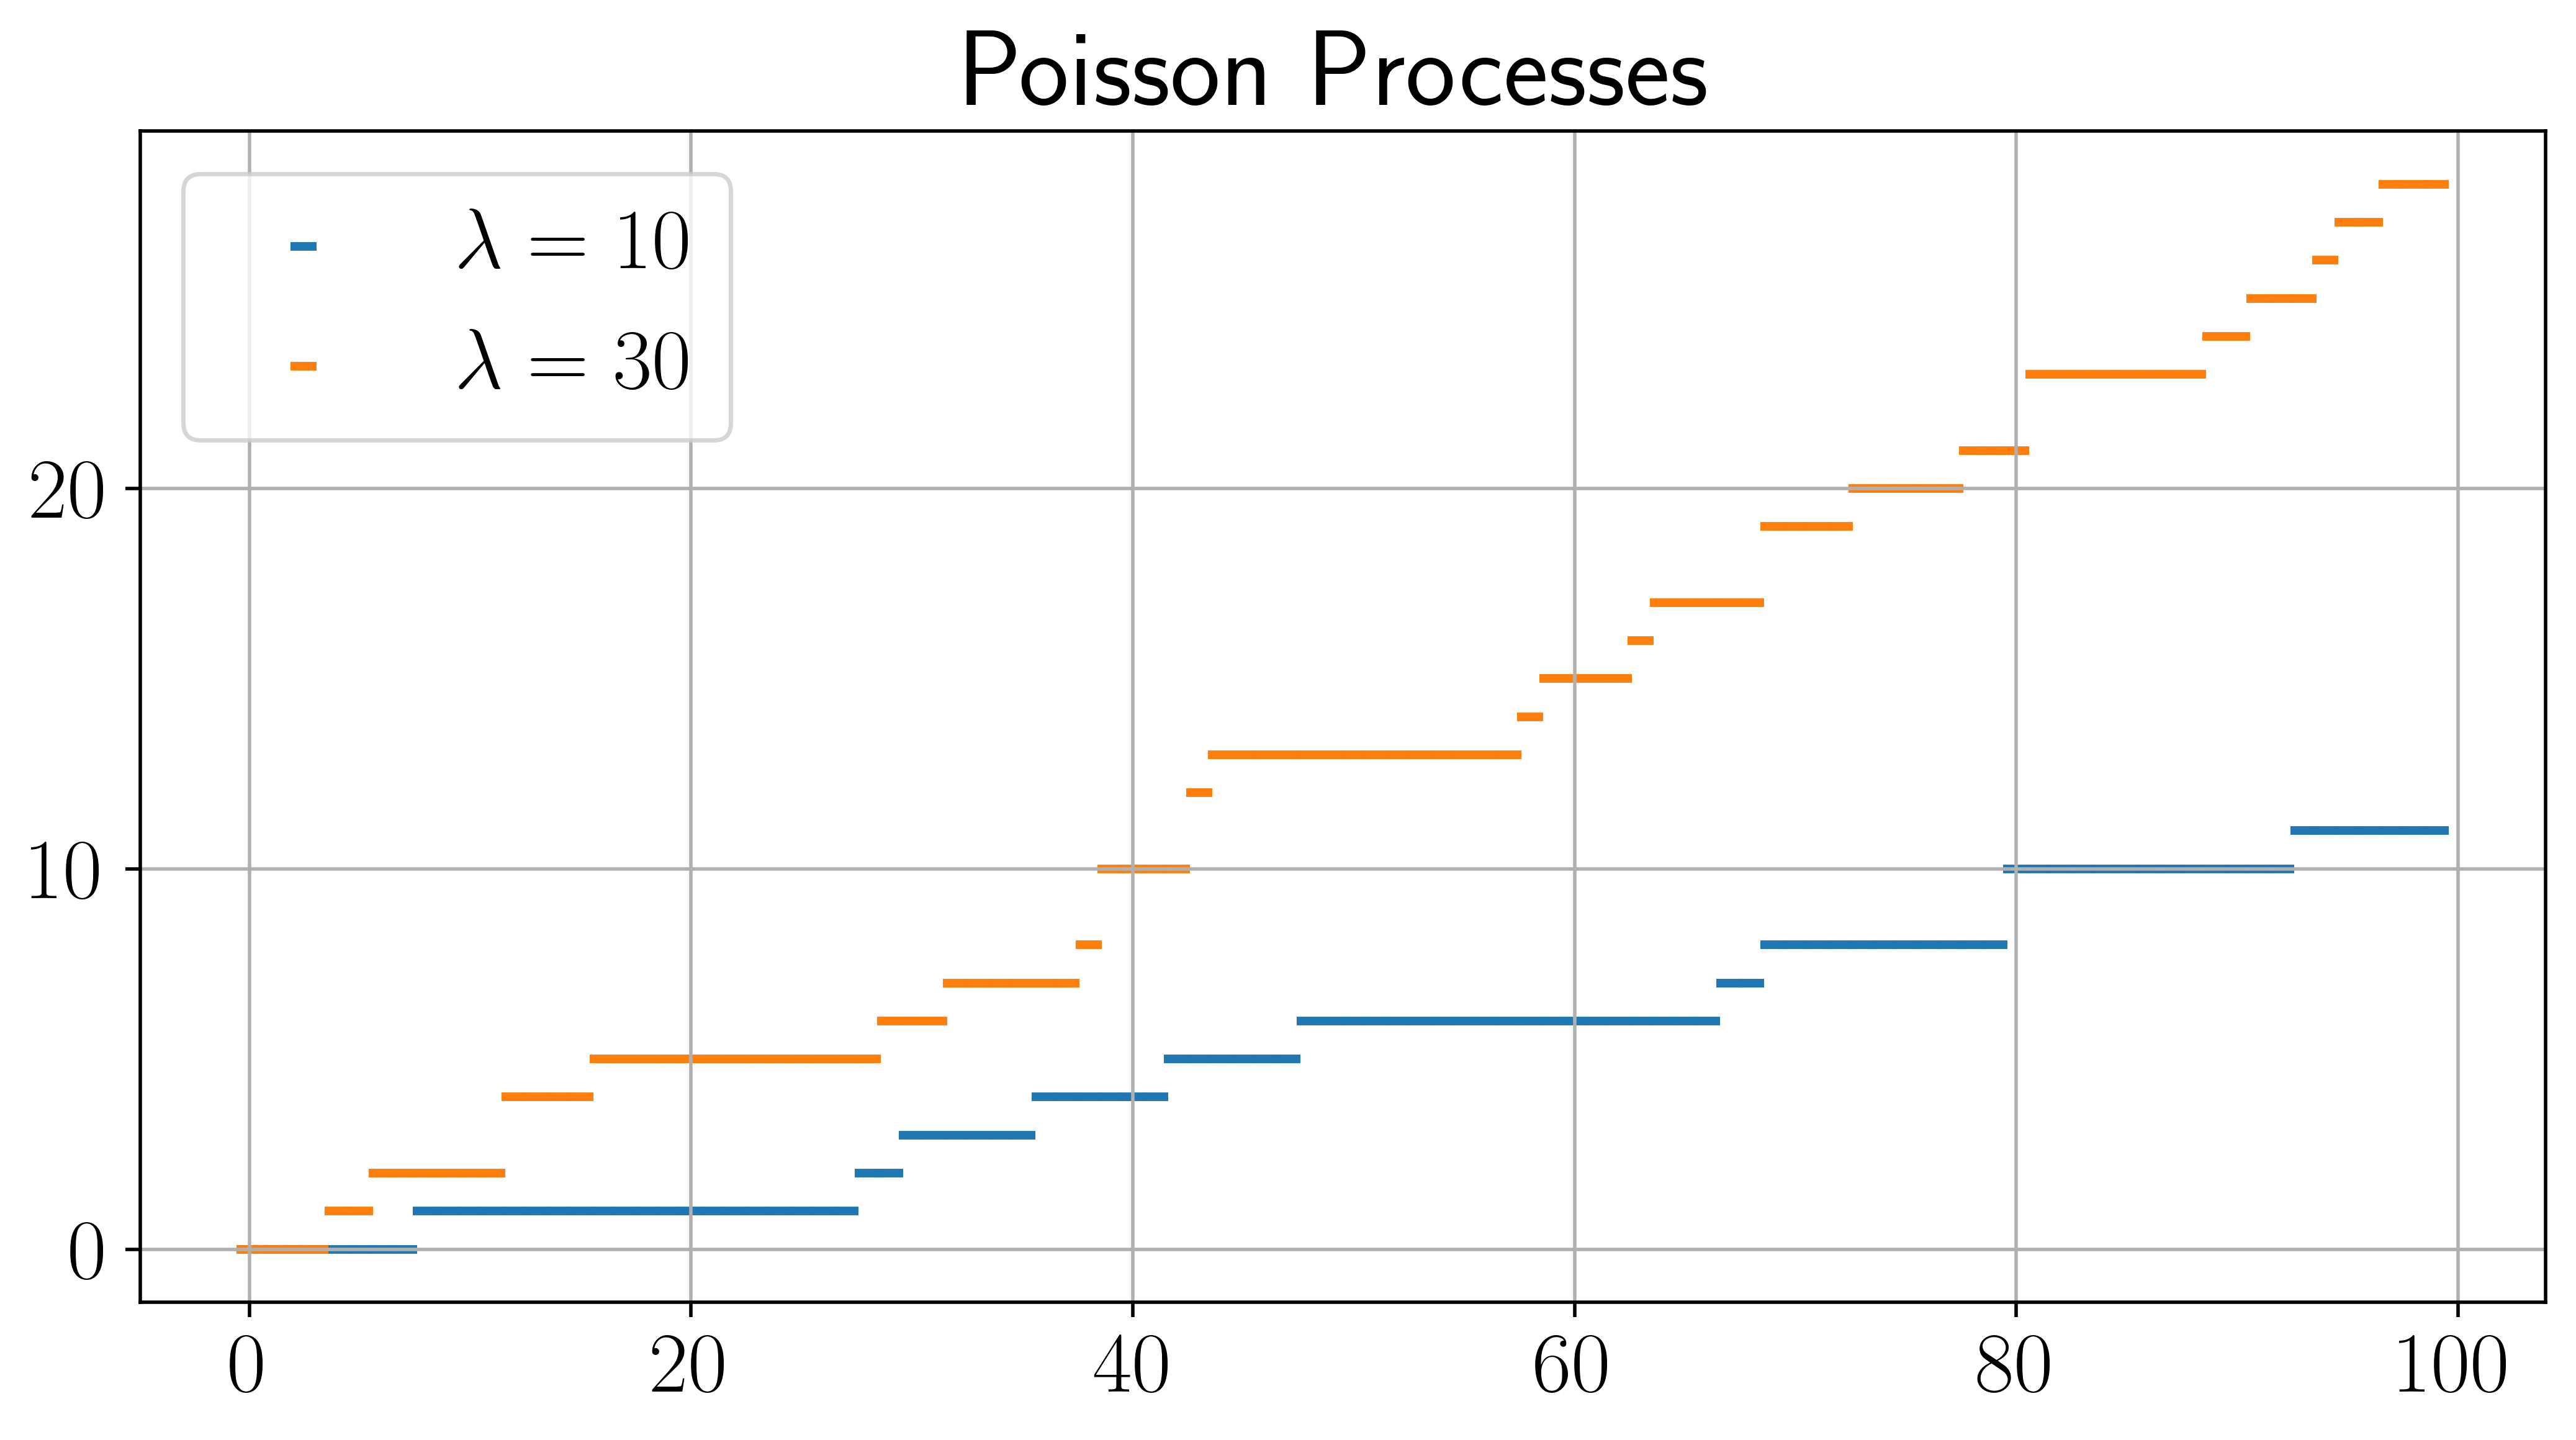

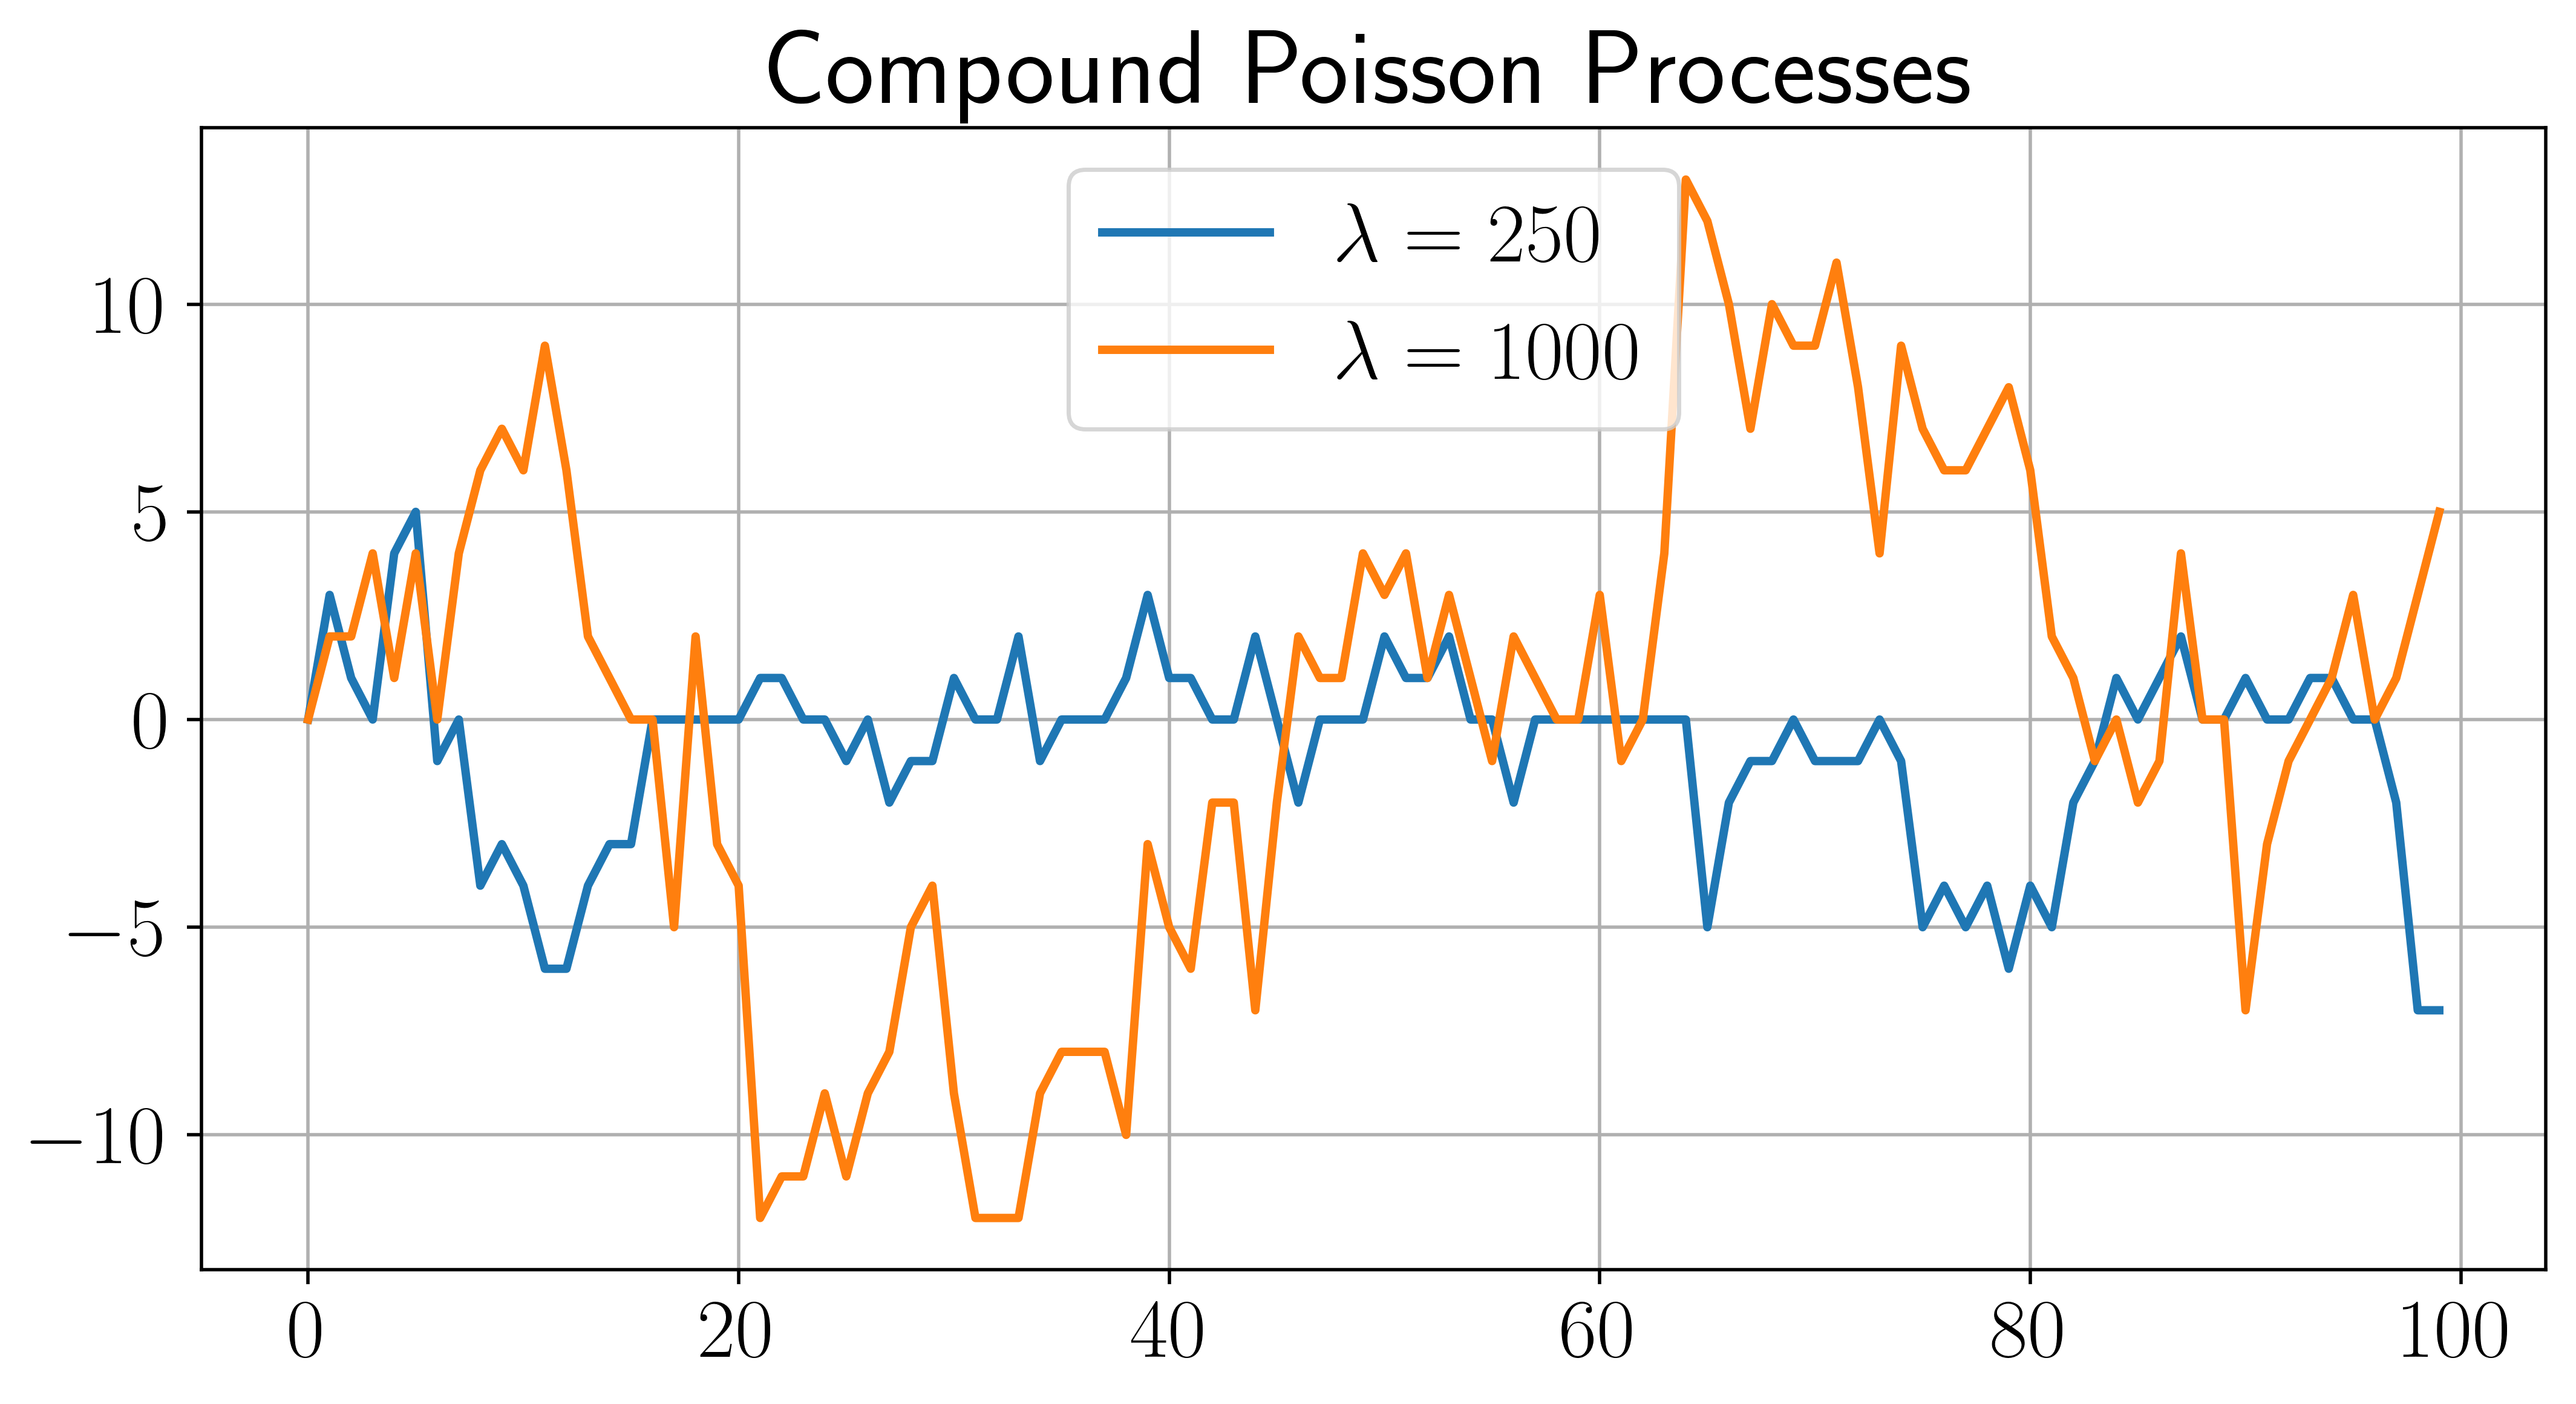

In [3]:
T = 1
n = 100


plt.figure(1)
plt.title('Poisson Processes')
plt.scatter(range(n),N_t(10,T,n), label = '$\lambda = 10$', marker = '_', linewidth =2)
plt.scatter(range(n),N_t(30,T,n), label = '$\lambda = 30$', marker = '_', linewidth =2)
plt.grid()
plt.legend()


plt.figure(2)
plt.title('Compound Poisson Processes')    
plt.plot(range(n),Comp_Poiss(250,0,1,T,n), label = '$\lambda = 250$', linewidth =2)
plt.plot(range(n),Comp_Poiss(1000,0,1,T,n), label = '$\lambda = 1000$', linewidth =2)
plt.grid()
plt.legend()